#  IN3050/IN4050 Mandatory Assignment 1: Traveling Salesman Problem


## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

Especially, notice that you are **not allowed to use code or parts of code written by others** in your submission. We do check your code against online repositories, so please be sure to **write all the code yourself**. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, February 25 2022, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a Python program if you prefer.

If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a pdf of your solution which shows the results of the runs.

If you prefer not to use notebooks, you should deliver the code, your run results, and a pdf-report where you answer all the questions and explain your work.

Your report/notebook should contain your name and username.

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You may use whichever programming language you like, but we strongly suggest that
you try to use Python, since you will be required to write the second assignment in Python. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. If you use Python, the **itertools** module provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Helper code for visualizing solutions

Here follows some helper code that you can use to visualize the plans you generate. These visualizations can **help you check if you are making sensible tours or not**. The optimization algoritms below should hopefully find relatively nice looking tours, but perhaps with a few visible inefficiencies.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#Map of Europe
europe_map =plt.imread('map.png')

#Lists of city coordinates
city_coords={"Barcelona":[2.154007, 41.390205], "Belgrade": [20.46,44.79], "Berlin": [13.40,52.52], "Brussels":[4.35,50.85],"Bucharest":[26.10,44.44], "Budapest": [19.04,47.50], "Copenhagen":[12.57,55.68], "Dublin":[-6.27,53.35], "Hamburg": [9.99, 53.55], "Istanbul": [28.98, 41.02], "Kiev": [30.52,50.45], "London": [-0.12,51.51], "Madrid": [-3.70,40.42], "Milan":[9.19,45.46], "Moscow": [37.62,55.75], "Munich": [11.58,48.14], "Paris":[2.35,48.86], "Prague":[14.42,50.07], "Rome": [12.50,41.90], "Saint Petersburg": [30.31,59.94], "Sofia":[23.32,42.70], "Stockholm": [18.06,60.33],"Vienna":[16.36,48.21],"Warsaw":[21.02,52.24]}

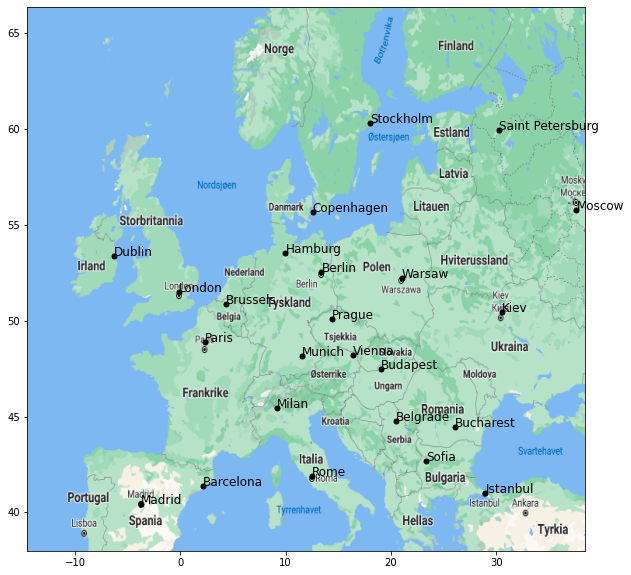

In [2]:
#Helper code for plotting plans
#First, visualizing the cities.
import csv
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]
    
fig, ax = plt.subplots(figsize=(10,10))

ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")



# Map (long, lat) to (x, y) for plotting
for city,location in city_coords.items():
    x, y = (location[0], location[1])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, city, fontsize=12);

In [3]:
#A method you can use to plot your plan on the map.
def plot_plan(city_order):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) -1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = current_city_coords[0], current_city_coords[1]
        #Plotting a line to the next city
        next_x, next_y = next_city_coords[0], next_city_coords[1]
        plt.plot([x,next_x], [y,next_y])
        
        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12);
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = first_city_coords[0], first_city_coords[1]
    plt.plot([next_x,first_x],[next_y,first_y])
    #Plotting a marker and index for the final city
    plt.plot(next_x, next_y, 'ok', markersize=5)
    plt.text(next_x, next_y, index+1, fontsize=12);


['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul', 'Kiev', 'London', 'Madrid', 'Milan', 'Moscow', 'Munich', 'Paris', 'Prague', 'Rome', 'Saint Petersburg', 'Sofia', 'Stockholm', 'Vienna', 'Warsaw']


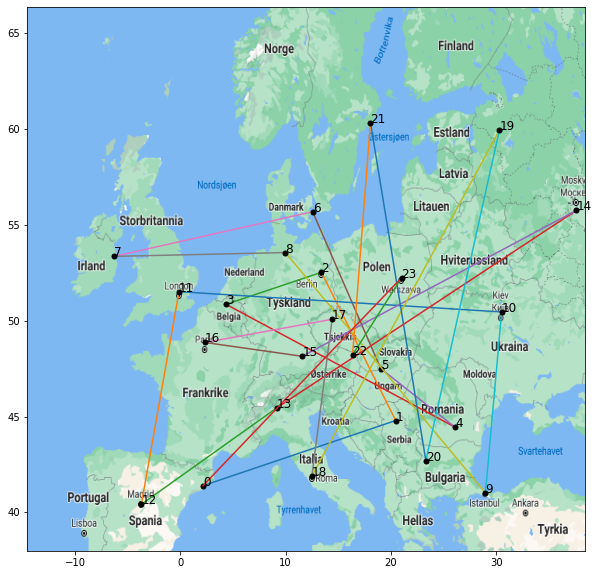

In [4]:
#Example usage of the plotting-method.
plan = list(city_coords.keys()) # Gives us the cities in alphabetic order
print(plan)
plot_plan(plan)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases. Plot the shortest tours you found using the plot_plan method above, for 6 and 10 cities.

5018.8099999999995
['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest']
('Barcelona', 'Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Brussels')
--- 0.019004106521606445 seconds for six cities ---
7486.309999999999
['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul']
('Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin')
--- 14.239182710647583 seconds for ten cities ---


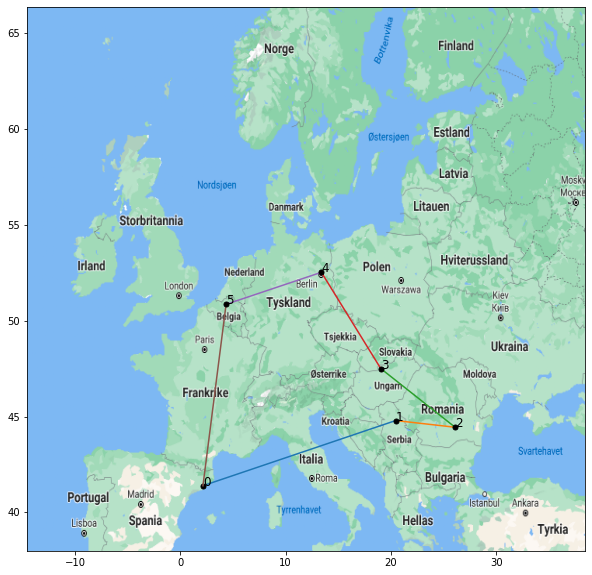

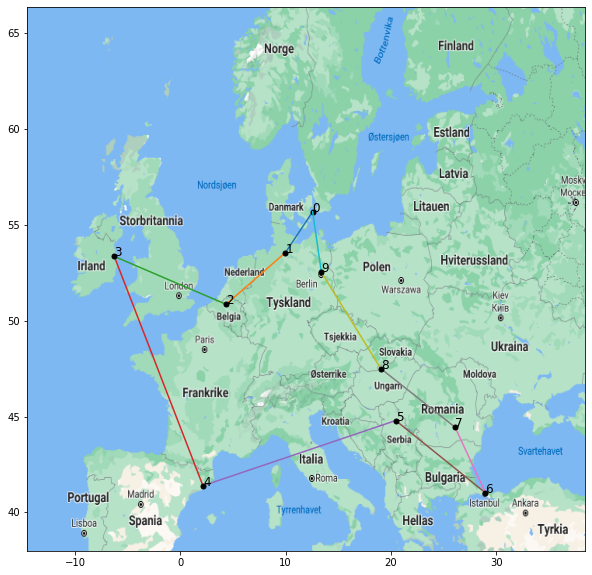

In [5]:
# Implement the algorithm here
import time
import numpy as np 
import itertools 
import csv 
import math

def exhaustiveSearch(N): 
    """
    Parameters: 
    ---------------------------------------------
    N : integer variable used to define number
        of cities to be included out of the 24 
        available cities. 
        
    Output: 
    ---------------------------------------------
    The most optimal route between N-cities.
    
    Description: 
    ---------------------------------------------
    This method performs an exhaustive search, 
    meaning that it checks all the possible routes 
    that can be taken for N-cities, and returns the 
    best one. 
    """
    
    plan = list(city_coords.keys()) # Gives us the cities in alphabetic order
    chosen_cities = []
    org_indx = []
    city_indx = {}
  
    for i in range(N):
        chosen_cities.append(plan[i])
        city_indx[plan[i]] = i
   # print(city_indx)
    all_routes = list(itertools.permutations(chosen_cities))
    
    
    with open("european_cities.csv", "r") as f:
        data = list(csv.reader(f, delimiter=';'))
   
    best_route = []
    length = math.inf
    for i in range(len(all_routes)): 
        n_route = all_routes[i]
        n_length = 0
        for j in range(1, len(n_route)):
            n_length += float(data[city_indx.get(n_route[j-1])+1][city_indx.get(n_route[j])])
        n_length += float(data[city_indx.get(n_route[N-1])+1][city_indx.get(n_route[0])])
        if n_length < length: 
            length = n_length
            best_route = n_route
            
    print(length)
    print(chosen_cities)
    print(best_route)
    plot_plan(best_route)
    #return chosen_cities
            

start_time = time.time()   
exhaustiveSearch(6)
print("--- %s seconds for six cities ---" % (time.time() - start_time))
start_time = time.time()   

start_time = time.time()   
exhaustiveSearch(10)
print("--- %s seconds for ten cities ---" % (time.time() - start_time))
    
    

What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

In [11]:
"""The best sequence of cities turns of to be: 
    ['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul']
The distance between those citites was: 7486.30999999...

And the time required to find the shortest distance using exhaustive search was: 15.11683702468872 seconds

I chose to calculate the approximation of the running time for 24 cities based upon the running time achieved for 10 cities as: 
    k = 15.11683702468872/10! * 10 = 4.165795 * 10^-7
    
    t(24! * 24) = k * 24! * 24 = 6.203186039276*10^18 seconds
    
    


SyntaxError: unterminated triple-quoted string literal (detected at line 12) (Temp/ipykernel_17088/329685127.py, line 1)

## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**. Plot one of the the plans from the 20 runs for both 10 cities and 24 cities (you can use plot_plan). 

--- 0.024015426635742188 seconds for ten cities ---
The best distance found by the hill climbing algorithm is: 7486.3099999999995
The worst distance found by the hill climbing algorithm is: 9454.72
The mean of the distances is: 8190.283, while the standard deviation is 676.5138733396384
--- 0.3330233097076416 seconds for 24 cities ---
The best distance found by the hill climbing algorithm is: 13202.4
The worst distance found by the hill climbing algorithm is: 16798.85
The mean of the distances is: 14769.126999999999, while the standard deviation is 790.242949491484


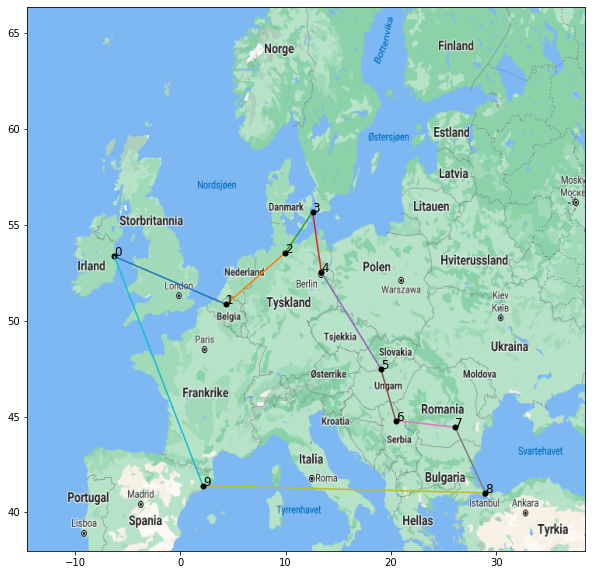

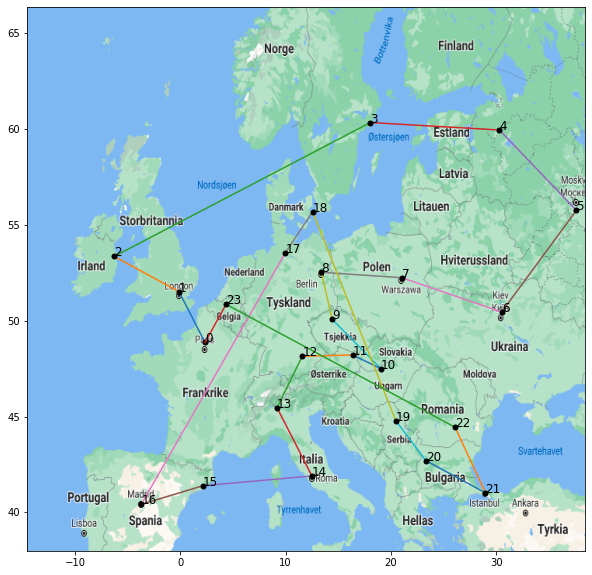

In [25]:
import time
import numpy as np 
import itertools 
import csv 
import math
import random
    
    
#-------------------------------------------------------------------------------#
    

def calculate_dist2(route, city_indx): 
    """
    Parameters: 
    ----------------------------------------------------------------
    route: List holding N-cities (strings)
    
    city_indx: Dictionary with city name as key, and it's index in
               'data' list as value.
               
    Output: 
    ----------------------------------------------------------------
    Total distance for the route.
    
    
    Description: 
    ----------------------------------------------------------------
    Given the route composed of N-different cities, and a dictionary 
    keeping track of the indexes of city in the data-table/-list read from 
    a csv file, this method calculates the total distance for the route. 
    """
    
    distance1 = 0
    for i in range(1, len(route)): 
        data_dist = data[city_indx.get(route[i-1])+1][city_indx.get(route[i])]
        distance1 += float(data_dist)
    data_dist = data[city_indx.get(route[0])+1][city_indx.get(route[len(route)-1])]
    distance1 += float(data_dist)
    return distance1
    
def newHillClimb(route, old_distance, city_indx, n_iter=100): 
    """
    Parameters: 
    --------------------------------------------------------
    route: List of n_cities (strings)
    
    old_distance: float variable, the total distance for the route 
                  before local search is performed
                  
    city_indx: Dictionary with city name as key, and it's index in
               'data' list as value.
    
    n_iter: Integer variable defining maximal amount of recursive calls
    
      Output: 
    --------------------------------------------------------
    The most optimal route between N-cities after n_iter 
    recursive calls.
    
    Description: 
    --------------------------------------------------------
    Given the variables listed above, this method swaps two random cities 
    in the list wth each other, and if the swaps yields a shorter total distance,
    the swap is kept. However, if the swap doesn't improve the total distance, it's 
    discarded. 
    """
    if n_iter == 0: 
        return route, old_distance
       
    city1 = np.random.randint(len(route))
    city2 = np.random.randint(len(route))
    while city2 == city1: 
        city2 = np.random.randint(len(route))
    
    route[city1], route[city2] = route[city2], route[city1]
    
    new_distance = calculate_dist2(route, city_indx)
    if new_distance < old_distance: 
        old_distance = new_distance
        return newHillClimb(route, old_distance, city_indx, n_iter-1)
    else: 
        route[city1], route[city2] = route[city2], route[city1]
        return newHillClimb(route, old_distance, city_indx, n_iter-1)
#-------------------------------------------------------------------------------#

cities1 = plan[0:10].copy()
# Creating the template route for furhter creation of random start routes
route1 = cities1.copy()
# Dictionary holding the indexes of cities in the data list above. Used for 
# calculating the total distance in method calculate_dist2
city_indx = {}
for i in range(len(cities1)):
    city_indx[cities1[i]] = i

old_distance = calculate_dist2(cities1, city_indx)

routes = []
distances = []
start_time = time.time()   
for i in range(20):   
    random.shuffle(route1)
    best_plan, best_dist = newHillClimb(route1, old_distance, city_indx)
    distances.append(best_dist)
    routes.append(best_plan)
    


print("--- %s seconds for ten cities ---" % (time.time() - start_time))
print(f'The best distance found by the hill climbing algorithm is: {min(distances)}')
print(f'The worst distance found by the hill climbing algorithm is: {max(distances)}')
print(f'The mean of the distances is: {np.mean(distances)}, while the standard deviation is {np.std(distances)}')
index = distances.index(best_dist)
best_route = routes[index]
# Plot of the best route found for ten cities
plot_plan(best_route)

# Same as for ten towns, this time though, done for all 24 cities. 
route2 = plan.copy()
city_indx2 = {}
for i in range(len(route2)):
    city_indx2[route2[i]] = i
    
old_distance2 = calculate_dist2(route2, city_indx2)
routes24 = []
distances24 = []
start_time = time.time()   
for i in range(20):   
    random.shuffle(route2)
    best_plan, best_dist = newHillClimb(route2, old_distance2, city_indx2, n_iter=1000)
    distances24.append(best_dist)
    routes24.append(best_plan)
    

print("--- %s seconds for 24 cities ---" % (time.time() - start_time))
print(f'The best distance found by the hill climbing algorithm is: {min(distances24)}')
print(f'The worst distance found by the hill climbing algorithm is: {max(distances24)}')
print(f'The mean of the distances is: {np.mean(distances24)}, while the standard deviation is {np.std(distances24)}')
index = distances24.index(min(distances24))
best_route2 = routes24[index]
# Plot of the best route found for 24 cities
plot_plan(best_route2)
    
#plot_plan(best_plan)
#print(distance1)
    
    
    
    
    
    

## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. Conclude which is best in terms of tour length and number of generations of evolution
time.

Finally, plot an example optimized tour (the best of the final generation) for the three different population sizes, using the plot_plan method.

--- 12.446536779403687 seconds for ten cities ---
Resulats for individuals consisting of 24 cities: 
For population of size 10
The best distance found by the GA algorithm is: 7486.31
The worst distance found by the GA algorithm is: 10293.69
The mean of the distances is: 8512.409500000002, while the standard deviation is 696.3837509626071


For population of size 50
The best distance found by the GA algorithm is: 7503.1
The worst distance found by the GA algorithm is: 9332.7
The mean of the distances is: 8097.192999999999, while the standard deviation is 463.2077077197659


For population of size 100
The best distance found by the GA algorithm is: 7486.3099999999995
The worst distance found by the GA algorithm is: 8567.89
The mean of the distances is: 7782.610000000001, while the standard deviation is 259.53878482800974


Resulats for individuals consisting of 24 cities: 
--- 67.05210638046265 seconds for 24 cities ---
For population of size 10
The best distance found by the GA algorith

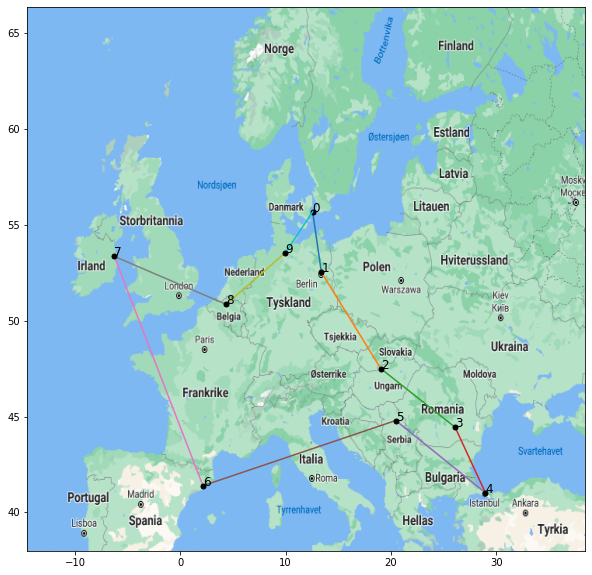

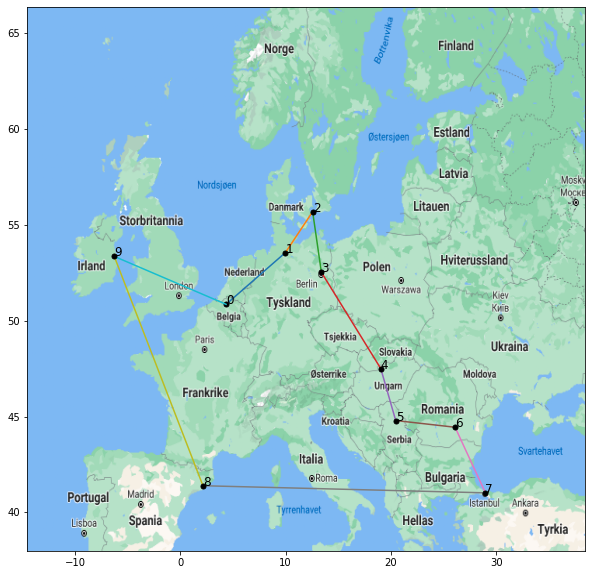

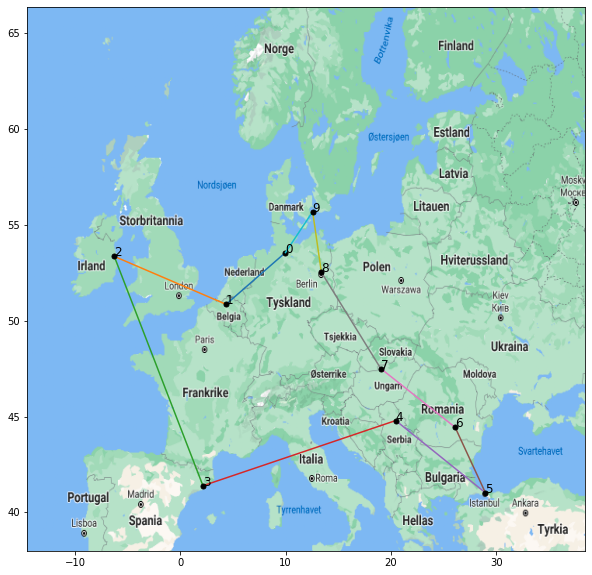

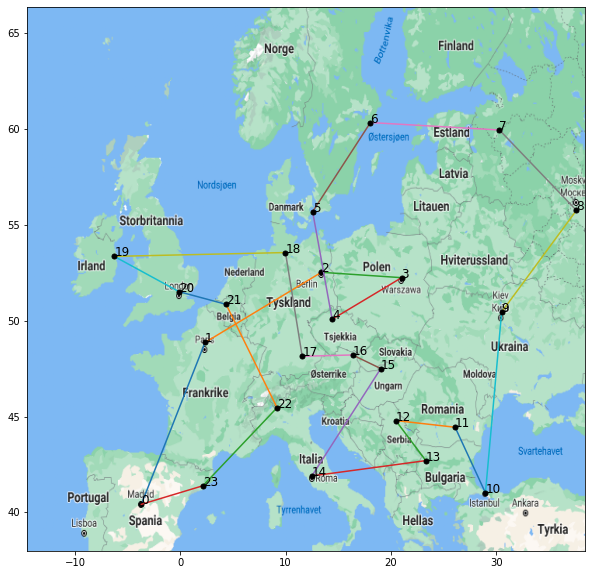

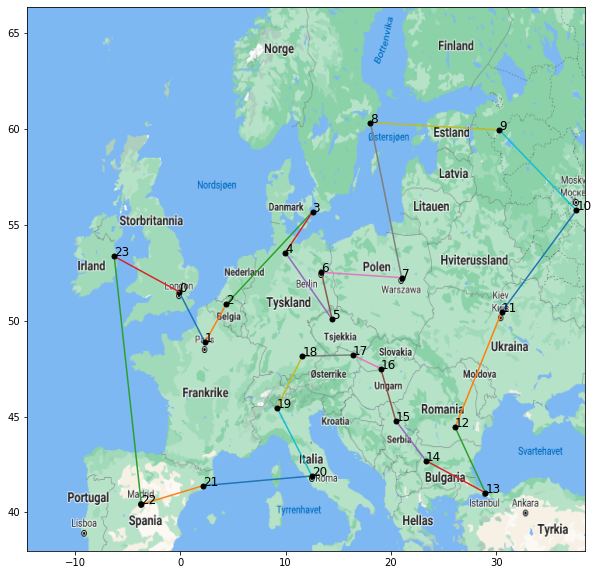

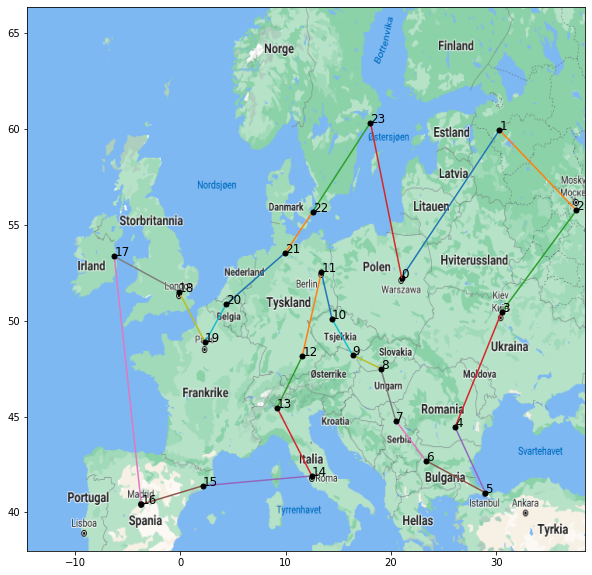

In [22]:

import itertools
import random
import statistics as stat
import scipy.stats as stats

pop_size = 1000
template = plan.copy()


def calculate_dist(route, city_indx): 
    
    """
    Parameters: 
    ----------------------------------------------------------------
    route: List holding N-cities (strings)
    
    city_indx: Dictionary with city name as key, and it's index in
               'data' list as value.
               
    Output: 
    ----------------------------------------------------------------
    Total distance for the route.
    
    
    Description: 
    ----------------------------------------------------------------
    Given the route composed of N-different cities, and a dictionary 
    keeping track of the indexes of city in the data-table/-list read from 
    a csv file, this method calculates the total distance for the route. 
    """
    distance1 = 0
    for i in range(1, len(route)): 
        data_dist = data[city_indx.get(route[i-1])+1][city_indx.get(route[i])]
        distance1 += float(data_dist)
    data_dist = data[city_indx.get(route[0])+1][city_indx.get(route[len(route)-1])]
    distance1 += float(data_dist)
    return distance1
    
    
def createPopulation(population_size, individual_size=24): 
    """
    Parameters: 
    ---------------------------------------------------------------
    population_size: integer variable defining the size of population 
                    that is to be created for GA (circle_of_life)
    individual_size: integer variable that sets the length of list 
                    of towns and has a max_value = 24
                    
    Output: 
    ---------------------------------------------------------------
    population: list of list containing N=population_size N-individual
                routes/lists 
    city_indx: Dictionary with city name as key, and it's index in
               'data' list as value.
               
    Description: 
    ---------------------------------------------------------------
    This method, given two arguments as parameters, as described above,
    creates a population of randomly selected routes through N-cities,
    where N is an integer variable defined by individual_size, which has 
    a default value of 24. 
    """
    
    template = plan[:individual_size].copy()
    population = []
    for i in range(population_size): 
        population.append(random.sample(template, individual_size))
    
    city_indx = {}
    for i in range(len(template)):
        city_indx[template[i]] = i
    
    return population, city_indx

def ScrambleMutation1(route, prob=0): 
    
    ind1 = np.random.randint(len(route))
    ind2 = np.random.randint(len(route))
    
    while (ind2 < ind1) or abs(ind2 - ind1) > (len(route) // 2): 
        ind1 = np.random.randint(len(route))
        ind2 = np.random.randint(len(route))
    new_part = route[ind1:ind2].copy()

    random.shuffle(new_part)
    del route[ind1:ind2]
    for i in range(len(new_part)): 
        route.insert(ind1+i, new_part[i])
    return route

def ScrambleMutation2(route, prob=0.0): 
    
    """
    Parameters: 
    -------------------------------------------------------------------
    route: list of N-cities 
    
    prob: Float variable, with values in interval 0.0 to 1.0 permitted. 
    
    Output: 
    -------------------------------------------------------------------
    route: List which was sent into the method as an argument, but now with 
            a part of it reordered in a random order.
    
    """
    
    if prob > random.random(): 
        
        ind1 = np.random.randint(0, len(route)//2)
        ind2 = np.random.randint(len(route)//2, len(route)-1)

        while (ind2 - ind1) > (len(route) // 2) or (ind2 -ind1) < 4 : 
            ind1 = np.random.randint(len(route))
            ind2 = np.random.randint(len(route))
        new_part = route[ind1:ind2].copy()
      
        random.shuffle(new_part)
        del route[ind1:ind2]
        for i in range(len(new_part)): 
            route.insert(ind1+i, new_part[i])
        return route
    else: 
        return route
    
def InversionMutation(route, prob=0.0): 
    
    """
    Parameters: 
    -------------------------------------------------------------------
    route: list of N-cities 
    
    prob: Float variable, with values in interval 0.0 to 1.0 permitted. 
    
    Output: 
    -------------------------------------------------------------------
    route: The list which was sent as the argument of the method, with a 
            intervall in it having inversed order.
    """
    
    if prob > random.random(): 
        
        ind1 = np.random.randint(0, len(route)//2)
        ind2 = np.random.randint(len(route)//2, len(route)-1)

        while (ind2 - ind1) > (len(route) // 2) : 
            ind1 = np.random.randint(len(route))
            ind2 = np.random.randint(len(route))
        new_part = route[ind1:ind2].copy()
       
        new_part.reverse()
        del route[ind1:ind2]
        for i in range(len(new_part)): 
            route.insert(ind1+i, new_part[i])
        
        return route
    else: 
        return route
        
    

def PMX(par1, par2): 
    """
    Parameters: 
    -------------------------------------------------------------------
    par1: list of N-cities 
    
    par2: list of N-cities 
    
    Output: 
    -------------------------------------------------------------------
    offspring: A new list which is a combination of both parents, by performing
                Partially Mapped Crossover
    """
    
    index1 = np.random.randint(len(par1)) 
    index2 = np.random.randint(len(par1))
    
    while index2 <= index1: 
        index2 = np.random.randint(len(par1))

    offspring, copy = [-1]*len(par1), par2.copy()
    offspring[index1:index2] = par1[index1:index2]
    del copy[index1: index2]

    int_copy1 = par1[index1:index2] 
    int_copy2 = par2[index1:index2]

    unique1, unique2 = [],[]
    
    for i in range(len(int_copy1)): 
        if int_copy1[i] not in int_copy2: 
            unique1.append(int_copy1[i])
        if int_copy2[i] not in int_copy1: 
            unique2.append(int_copy2[i])

    for i in range(len(unique1)):  
        offspring[par2.index(unique1[i])] = unique2[i]
        del copy[copy.index(unique1[i])]
        

    n_index = 0
    for j in range(len(par1)):
        if offspring[j] == -1: 
            offspring[j] = copy[n_index]
            n_index +=1

    return offspring

def CycleCrossover2(par1, par2, prob=0): 
 
    cycles = [-1]*len(par1)
    cycle_num = 1
    cyclestart = (i for i,v in enumerate(cycles) if v < 0)

    for pos in cyclestart: 

        while cycles[pos] < 0: 
            cycles[pos] = cycle_num
            pos = par1.index(par2[pos])
        cycle_num += 1 
    child1 = [par1[i] if n%2 else par2[i] for i,n in enumerate(cycles)]
    child2 = [par2[i] if n%2 else par1[i] for i,n in enumerate(cycles)]

    return child1, child2

def CycleCrossover(par1, par2, prob=1.0): 
    """
    Parameters: 
    -------------------------------------------------------------------
    par1: list of N-cities 
    
    par2: list of N-cities 
    
    Output: 
    -------------------------------------------------------------------
    offspring1, offspring2: Two new lists which are a combination of both parents,
    created by following cycles between both parents, and swapping elements of every 
    second cycle for par1 to par2 and vice versa.
    
    """
    
    cycles = [i for i in range(len(par1))]
    cycle_num = 1  
    offspring1, offspring2 = [0]*len(par1), [0]*len(par1)

    if prob > np.random.random():
        for i in range(len(cycles)): 

            if cycles[i] == -1:
                continue
            index = cycles[i]
            start_value = par1[index]
            while True:
                
                if cycle_num % 2: 
                    offspring1[index] = par2[index]
                    offspring2[index] = par1[index]
                    cycles[index] = -1
                    index = par1.index(par2[index])
                    if par1[index] == start_value: 
                        break
                
                else: 
                    offspring1[index] = par1[index]
                    offspring2[index] = par2[index]
                    cycles[index] = -1
                    index = par1.index(par2[index])
                    if par1[index] == start_value: 
                        break
            cycle_num += 1 
        return  offspring2, offspring1
    else: 
        return par1, par2

def TournamentSelection(group, dic): # Used for selection of parents
    """
    This is the operator used for selecting parents to produce 
    offssrping in the upcoming generation. 
    
    In this case, the best fitness equals the shortest distance, 
    hence the best individual will have the lowest decimal number
    value to it. 
    
    I will be reusing calculate_dist method to compute total distance 
    for each individual. 
    """
    distances = [calculate_dist(group[i], dic) for i in range(len(group))]
    
    ind = distances.index(min(distances))
                                
    fittest = group[ind] 
    
    return fittest

# The Genetic Algorithm

def circle_of_life(n_epoch, population, pop_size, indx_dict, tournament_size, mutation_prob, num_of_parents): 
    """
    Parameters: 
    ------------------------------------------------------------------------
    n_epoch: Integer argument for setting number of generations in the algorithm. 

    population: List og N-unique routes consisting of individuals of size M-cities.
    
    pop_size: Integer variable describing the total number of individuals in the population. 
    
    indx_dict: Dictionary with city name as key, and it's index in 'data' list as value.
    
    tournament_size: size of tournament round used for parent selection
    
    mutation_prob: float variable describing the mutation probabilty, that an offspring is 
                    gonna be mutated by the mutation operator
    
    num_of_parents: Integer variable used to define the number of parents used to create new
                    offspring
                    
    Output: 
    --------------------------------------------------------------------------
    population: list of lists containing that is at least as good as the earlier generation
                or better. 
    
    fittest_indiv: the fittest indivdual among the whole population after n_epoch generations. 
    
    best_per_gen: list of lists containing the best individual for each generation.
               
    """
    fitnesses = []
    #list including the fitness of the best individual for each generation
    best_per_gen = []
    
    for k in range(n_epoch):
        parent_group = []
        tournament_group = []
        pop_copy = population.copy()
        # Tournament selection is performed with replacement
        while(len(parent_group) < num_of_parents):  
            for i in range(tournament_size):
                indx = np.random.randint(0, len(pop_copy))
                tournament_group.append(pop_copy[indx])
      
            parent_group.append(TournamentSelection(tournament_group, indx_dict))
        count = 0 
        for j in range(1,len(parent_group), 2): 
            offspring1, offspring2 = CycleCrossover(parent_group[j-1], parent_group[j])
            count += 1 
            offspring1 =  InversionMutation(offspring1, mutation_prob)
            offspring2 =  InversionMutation(offspring2, mutation_prob)
            population.append(offspring1)
            population.append(offspring2)

        # to perform selection of individuals based upon their fitness,
        # it's necessary to calculate distance for the whole population

        fitnesses = [calculate_dist(population[f], indx_dict) for f in range(len(population))]
        

        while(len(population) > pop_size): 
            del_indx = fitnesses.index(max(fitnesses))
            
            population.remove(population[del_indx])
            fitnesses.remove(fitnesses[del_indx])
        
        fittest_indiv_indx = fitnesses.index(min(fitnesses))
        fittest_indiv = population[fittest_indiv_indx]
        best_per_gen.append(min(fitnesses))
            
    
    fittest_indiv_indx = fitnesses.index(min(fitnesses))
    fittest_indiv = population[fittest_indiv_indx]
    
    return population, fittest_indiv, best_per_gen

#------------------------------------------------------------------------------#

# Plotting valeus for 10 cities 
start_time = time.time()  

fittest10 = []
fit10 = []
tournament_size10 = 10
num_of_parents10  = 10
tournament_size10 = [2, 10, 15]
num_of_parents10 = [2, 10, 15]
populations10 = [10, 50, 100]
generations10 = 50
mutation_rates10 = [0.7, 0.7, 0.7]

fittest_indivs = []
best_across_runs = []
best_avr_per_gen_pop = []
for i in range(len(populations10)):
    bests = []
    fittest10 = []
   
    for j in range(20):
        pop, dic = createPopulation(populations10[i],  individual_size=10) 
        pop, fit, best_per_gen = circle_of_life(generations10, pop, len(pop), dic, tournament_size10[i] , 0.7, num_of_parents10[i])
        fittest10.append(fit)
        bests.append(best_per_gen)
   
    indx = 0 
    best_avr_per_gen = []
   
    for i in range(len(bests[0])):
        value = 0
        indx = 0  
        for j in range(len(bests)):
            value += bests[indx][i]
           
        indx += 1 
        value /= len(bests)
        best_avr_per_gen.append(value)
        
    best_avr_per_gen_pop.append(best_avr_per_gen)
    fitnesses10 = [calculate_dist(fittest10[f], dic) for f in range(len(fittest10))]

    fit_indx = fitnesses10.index(min(fitnesses10))
    fit = fittest10[fit_indx]
   
    best_across_runs.append(fit)
    fit10.append(fitnesses10)

x = [i for i in range(1,51)]
print("--- %s seconds for ten cities ---" % (time.time() - start_time))

print("Resulats for individuals consisting of 24 cities: ")
print(f'For population of size {populations10[0]}')
print(f'The best distance found by the GA algorithm is: {min(fit10[0])}')
print(f'The worst distance found by the GA algorithm is: {max(fit10[0])}')
print(f'The mean of the distances is: {np.mean(fit10[0])}, while the standard deviation is {np.std(fit10[0])}')
print('\n')
plot_plan(best_across_runs[0])
print(f'For population of size {populations10[1]}')
print(f'The best distance found by the GA algorithm is: {min(fit10[1])}')
print(f'The worst distance found by the GA algorithm is: {max(fit10[1])}')
print(f'The mean of the distances is: {np.mean(fit10[1])}, while the standard deviation is {np.std(fit10[1])}')
print('\n')
plot_plan(best_across_runs[1])
print(f'For population of size {populations10[2]}')
print(f'The best distance found by the GA algorithm is: {min(fit10[2])}')
print(f'The worst distance found by the GA algorithm is: {max(fit10[2])}')
print(f'The mean of the distances is: {np.mean(fit10[2])}, while the standard deviation is {np.std(fit10[2])}')
plot_plan(best_across_runs[2])
print("\n")


# Plotting valued for 24 cities
start_time = time.time() 
fittest24 = []
fit24 = []
tournament_size24 = 10
num_of_parents24  = 10
tournament_size24 = [5, 10, 15]
num_of_parents24 = [5, 10, 15]
populations24 = [10, 50, 100]
generations24 = 150
mutation_rates24 = [0.45, 0.7, 0.7]

fittest_indivs24 = []
best_across_runs24 = []
best_avr_per_gen_pop24 = []
for i in range(len(populations24)):
    bests24 = []
    fittest24 = []
    for j in range(20):
        pop24, dic24 = createPopulation(populations24[i], individual_size=24) 
     
        pop24, fit2, best_per_gen24 = circle_of_life(generations24, pop24, len(pop24), dic24, tournament_size24[i], 0.7, num_of_parents24[i])
        fittest24.append(fit2)
        bests24.append(best_per_gen24)

    best_avr_per_gen24 = []
    
    for i in range(len(bests24[0])):
        value24 = 0
        indx24 = 0  
        for j in range(len(bests24)):
            value24 += bests24[indx24][i]
            indx24 += 1 
        value24 /= len(bests24)
        best_avr_per_gen24.append(value24)
    
    best_avr_per_gen_pop24.append(best_avr_per_gen24)
    fitnesses24 = [calculate_dist(fittest24[f], dic24) for f in range(len(fittest24))]

    fit_indx24 = fitnesses24.index(min(fitnesses24))
    fit2 = fittest24[fit_indx24]
 
    best_across_runs24.append(fit2)
    fit24.append(fitnesses24)

print("Resulats for individuals consisting of 24 cities: ")
print("--- %s seconds for 24 cities ---" % (time.time() - start_time))
print(f'For population of size {populations24[0]}')
print(f'The best distance found by the GA algorithm is: {min(fit24[0])}')
print(f'The worst distance found by the GA algorithm is: {max(fit24[0])}')
print(f'The mean of the distances is: {np.mean(fit24[0])}, while the standard deviation is {np.std(fit24[0])}')
print('\n')
plot_plan(best_across_runs24[0])
print(f'For population of size {populations24[1]}')
print(f'The best distance found by the GA algorithm is: {min(fit24[1])}')
print(f'The worst distance found by the GA algorithm is: {max(fit24[1])}')
print(f'The mean of the distances is: {np.mean(fit24[1])}, while the standard deviation is {np.std(fit24[1])}')
print('\n')
plot_plan(best_across_runs24[1])
print(f'For population of size {populations24[2]}')
print(f'The best distance found by the GA algorithm is: {min(fit24[2])}')
print(f'The worst distance found by the GA algorithm is: {max(fit24[2])}')
print(f'The mean of the distances is: {np.mean(fit24[2])}, while the standard deviation is {np.std(fit24[2])}')
plot_plan(best_across_runs24[2])
print("Maps of best individuals of size 10 ploted after 20 runs for each population size in ascending order, and then for "
     "individuals of size 24")







Plot og average best individual for each generation across 20 runs, for routes build of 10 cities: 


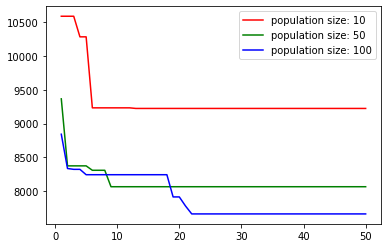

Plot og average best individual for each generation across 20 runs, for routes build of 24 cities: 


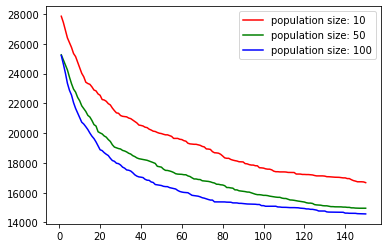

In [26]:
"""
Conclude which is best in terms of tour length and number of generations of evolution time.

As can be seen from the plots, it's clear that the results from the largest populations of size 100 yield the best results. 
They result in the best tour length, lowest mean and standard deviations. It's possible that running the algorithm for even 
larger populations than 100 could yeild better results, as more exploration would be performed. However, due to time limitations
and the running time for all three combinations, I have not done so. Although it's possible to do just by changing some 
numbers in the code above. 
"""

print("Plot of average best individual for each generation across 20 runs, for routes build of 10 cities: ")
x = [i for i in range(1,51)]
plt.plot(x, best_avr_per_gen_pop[0], 'r', label = f'population size: {populations10[0]}')
plt.plot(x, best_avr_per_gen_pop[1], 'g', label = f'population size: {populations10[1]}')
plt.plot(x, best_avr_per_gen_pop[2], 'b', label = f'population size: {populations10[2]}')
plt.legend()
plt.show()

print("Plot of average best individual for each generation across 20 runs, for routes build of 24 cities: ")
x3 = [i for i in range(1,151)]
plt.plot(x3, best_avr_per_gen_pop24[0], 'r', label = f'population size: {populations24[0]}')
plt.plot(x3, best_avr_per_gen_pop24[1], 'g', label = f'population size: {populations24[1]}')
plt.plot(x3, best_avr_per_gen_pop24[2], 'b', label = f'population size: {populations24[2]}')
plt.legend()
plt.show()

Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?

In [ ]:
"""
Question 1
-----------
My GA did find the the shortest tour among ten cities, and did it a bit faster than exhaustive search performed on ten cities.
It also came pretty close to the shortest tour among 24 cities, and did overall good. I'm certain though that if the GA was run 
on a larger population, with parameters fit accordingly, it would reach better results at the cost of a bit higher/longer 
running time (Those are experiments I will conduct later, hence they have not been reported).

Question 2 
----------
In both cases my GA is faster than exhaustive search, and especially in the case of 24 cities, where performing exhaustive 
search would demand cheking every single permutation out of 24!, where the estimated running time for cheking all the 24! 
permutations is 6.203186039276*10^18 seconds. Running the algorithm for each of the three population sizes 20 times takes 
between 64-47 seconds, which is an extreme improvement over exhaustive search.

Question 3
----------
After some testing, the GA does at most, when used with a population of size 100, individuals of size 24, 150 generations, 
and 15 parents chosen to create offspring, it explores 15*150 = 2250 tours. And if taking into the consideration that it was 
run 20 times, then 2250*20 = 45000 tours where inspected by the genatic algorithm at most. Whereas the exhaustive search had to 
check 3628800 tours only for tours of size 10.


"""

## Hybrid Algorithm (IN4050 only)
### Lamarckian
Lamarck, 1809: Traits acquired in parents’ lifetimes can be inherited by offspring. In general the algorithms are referred to as Lamarckian if the result of the local search stage replaces the individual in the population.
### Baldwinian
Baldwin effect suggests a mechanism whereby evolutionary progress can be guided towards favourable adaptation without the changes in individual's fitness arising from learning or development being reflected in changed genetic characteristics. In general the algorithms are referred to as Baldwinian if the original member is kept, but has as its fitness the value belonging to the outcome of the local search process.


(See chapter 10 and 10.2.1 from Eiben and Smith textbook for more details. It will also be lectured in Lecure 4)

### Task
Implement a hybrid algorithm to solve the TSP: Couple your GA and hill climber by running the hill climber a number of iterations on each individual in the population as part of the evaluation. Test both Lamarckian and Baldwinian learning models and report the results of both variants in the same way as with the pure GA (min,
max, mean and standard deviation of the end result and an averaged generational plot). How do the results compare to that of the pure GA, considering the number of evaluations done?

Resulats for individuals consisting of 24 cities when using Lamarckian method with 40 generations for each pop_size: 
--- 23.871483325958252 seconds for 24 cities using Lamarckian Approach ---
For population of size 10
The best distance found by the GA algorithm is: 13076.92
The worst distance found by the GA algorithm is: 15574.25
The mean of the distances is: 13932.771499999999, while the standard deviation is 653.1814152306764


For population of size 50
The best distance found by the GA algorithm is: 12423.080000000004
The worst distance found by the GA algorithm is: 13975.319999999998
The mean of the distances is: 13237.908000000001, while the standard deviation is 407.5066710079721


For population of size 100
The best distance found by the GA algorithm is: 12287.070000000002
The worst distance found by the GA algorithm is: 14831.850000000004
The mean of the distances is: 13329.815500000002, while the standard deviation is 540.9429931561646
Maps of best individuals using Lamarck 

"\nThough I'm a bachelor's student and not really obligated to solve this task, I thought of it as a fun challenge and decided to \ntry my best in solving it. I am pretty satisfied with th results, but due to lack of time, I have not commented this solutions \nas good as those for the the earlier tasks.\n"

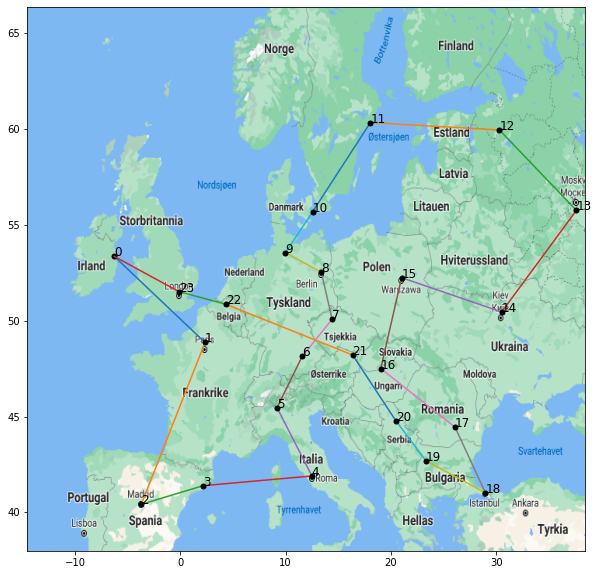

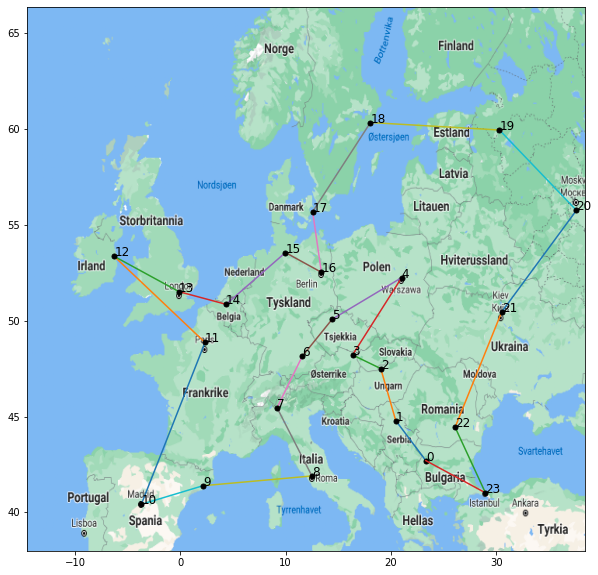

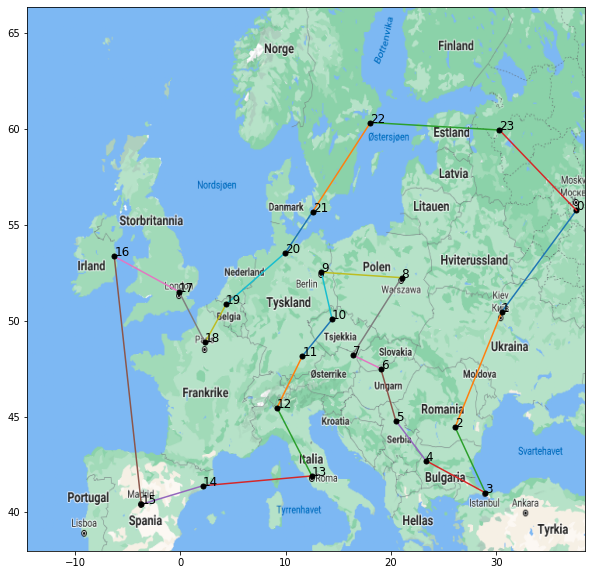

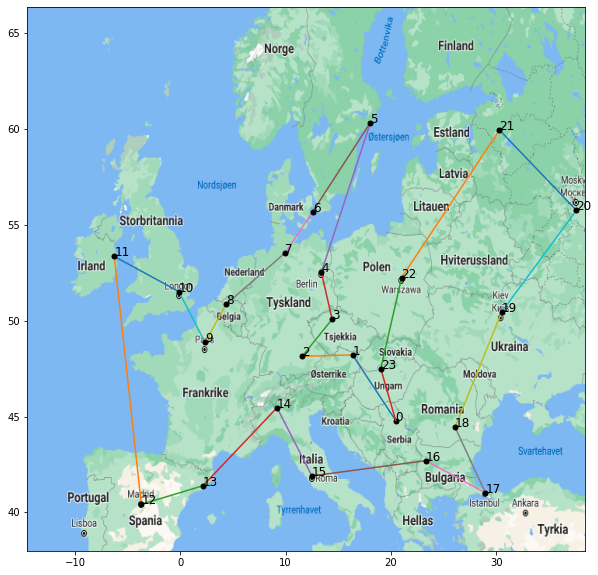

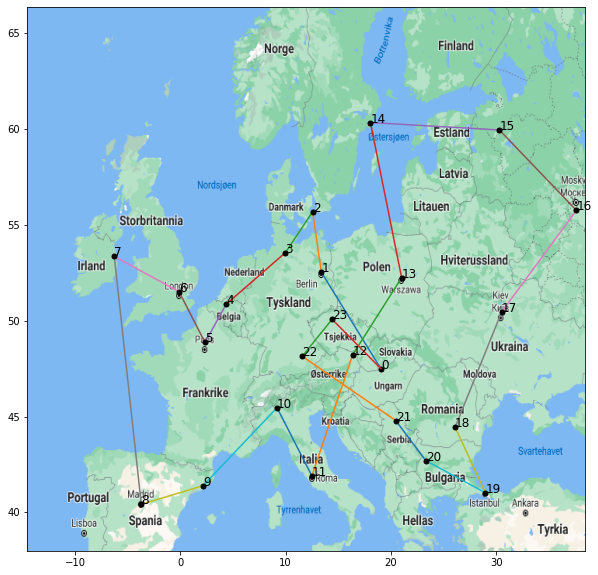

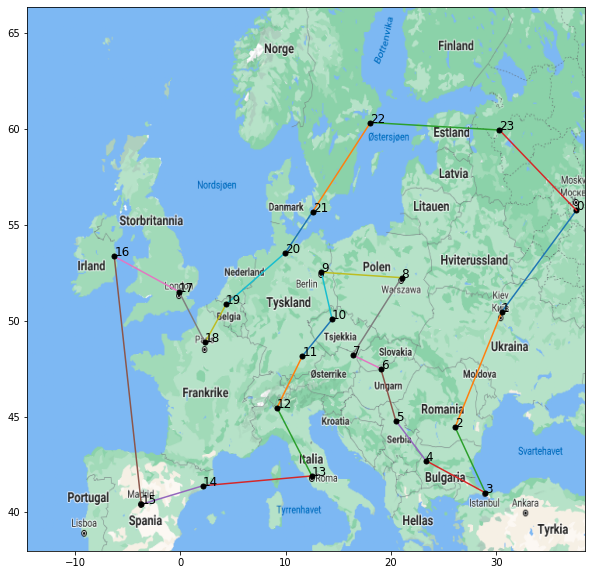

In [55]:
    
def newHillClimb(route, old_distance, city_indx, n_iter=100): 
    
    if n_iter == 0: 
        return route, old_distance
       
    city1 = np.random.randint(len(route))
    city2 = np.random.randint(len(route))
    while city2 == city1: 
        city2 = np.random.randint(len(route))
    
    route[city1], route[city2] = route[city2], route[city1]
    
    new_distance = calculate_dist(route, city_indx)
    if new_distance < old_distance: 
        old_distance = new_distance
        return newHillClimb(route, old_distance, city_indx, n_iter-1)
    else: 
        route[city1], route[city2] = route[city2], route[city1]
        return newHillClimb(route, old_distance, city_indx, n_iter-1)

# Lamarckian method 

def circle_of_life2(n_epoch, population, pop_size, indx_dict, tournament_size, mutation_prob, num_of_parents): 
    
    fitnesses = []
    best_per_gen = []
    for k in range(n_epoch):
        parent_group = []
        tournament_group = []
        pop_copy = population.copy()
        for i in range(len(population)): 
            population[i], old_dist = newHillClimb(population[i], calculate_dist(population[i], dic),dic, 10)
        
        pop_copy = population.copy()   
        while(len(parent_group) < num_of_parents):   
            for i in range(tournament_size):
                indx = np.random.randint(0, len(pop_copy))
                tournament_group.append(pop_copy[indx])
      
            parent_group.append(TournamentSelection(tournament_group, indx_dict))
        count = 0 
        for j in range(1,len(parent_group), 2): 
            offspring1, offspring2 = CycleCrossover(parent_group[i-1], parent_group[i])
            count += 1 
            offspring1 = InversionMutation(offspring1, mutation_prob)
            offspring2 = InversionMutation(offspring2, mutation_prob)
            population.append(offspring1)
            population.append(offspring2)

        # to perform selection of individuals based upon their fitness,
        # it's necessary to calculate distance for the whole population

        fitnesses = [calculate_dist(population[f], indx_dict) for f in range(len(population))]
        

        while(len(population) > pop_size): 
            del_indx = fitnesses.index(max(fitnesses))
            
            population.remove(population[del_indx])
            fitnesses.remove(fitnesses[del_indx])
          
        fittest_indiv_indx = fitnesses.index(min(fitnesses))
        fittest_indiv = population[fittest_indiv_indx]
        best_per_gen.append(min(fitnesses))
    
    fittest_indiv_indx = fitnesses.index(min(fitnesses))
    fittest_indiv = population[fittest_indiv_indx]
    
    return population, fittest_indiv, best_per_gen

start_time = time.time() 
fittest24 = []
fit24 = []
tournament_size24 = 10
num_of_parents24  = 10
tournament_size24 = [5, 10, 15]
num_of_parents24 = [5, 10, 15]
populations24 = [10, 50, 100]
generations24 = 25
mutation_rates24 = [0.45, 0.7, 0.7]

fittest_indivs24 = []
best_across_runs24 = []
best_avr_per_gen_pop24 = []
for i in range(len(populations24)):
    bests24 = []
    fittest24 = []
    for j in range(20):
        pop24, dic24 = createPopulation(populations24[i], individual_size=24) 
     
        pop24, fit2, best_per_gen24 = circle_of_life2(generations24, pop24, len(pop24), dic24, tournament_size24[i], 0.7, num_of_parents24[i])
        fittest24.append(fit2)
        bests24.append(best_per_gen24)

    best_avr_per_gen24 = []
    
    for i in range(len(bests24[0])):
        value24 = 0
        indx24 = 0  
        for j in range(len(bests24)):
            value24 += bests24[indx24][i]
            indx24 += 1 
        value24 /= len(bests24)
        best_avr_per_gen24.append(value24)
    
    best_avr_per_gen_pop24.append(best_avr_per_gen24)
    fitnesses24 = [calculate_dist(fittest24[f], dic24) for f in range(len(fittest24))]

    fit_indx24 = fitnesses24.index(min(fitnesses24))
    fit2 = fittest24[fit_indx24]
 
    best_across_runs24.append(fit2)
    fit24.append(fitnesses24)

print("Resulats for individuals consisting of 24 cities when using Lamarckian method with 40 generations for each pop_size: ")
print("--- %s seconds for 24 cities using Lamarckian Approach ---" % (time.time() - start_time))
print(f'For population of size {populations24[0]}')
print(f'The best distance found by the GA algorithm is: {min(fit24[0])}')
print(f'The worst distance found by the GA algorithm is: {max(fit24[0])}')
print(f'The mean of the distances is: {np.mean(fit24[0])}, while the standard deviation is {np.std(fit24[0])}')
print('\n')
plot_plan(best_across_runs24[0])
print(f'For population of size {populations24[1]}')
print(f'The best distance found by the GA algorithm is: {min(fit24[1])}')
print(f'The worst distance found by the GA algorithm is: {max(fit24[1])}')
print(f'The mean of the distances is: {np.mean(fit24[1])}, while the standard deviation is {np.std(fit24[1])}')
print('\n')
plot_plan(best_across_runs24[1])
print(f'For population of size {populations24[2]}')
print(f'The best distance found by the GA algorithm is: {min(fit24[2])}')
print(f'The worst distance found by the GA algorithm is: {max(fit24[2])}')
print(f'The mean of the distances is: {np.mean(fit24[2])}, while the standard deviation is {np.std(fit24[2])}')
plot_plan(best_across_runs24[2])
print("Maps of best individuals using Lamarck for tours between 24 cities ploted after 20 runs for each population size"
      " in ascending order, and then for Baldwin")
print('\n')
def TournamentSelection_baldwinian(group, dic): # Used for selection of parents
    
    #This is the operator used for selecting parents to produce 
    #offssrping in the upcoming generation. 
    
    #In this case, the best fitness equals the shortest distance, 
    #hence the best individual will have the lowest decimal number
    #value to it. 
    
    #I will be reusing calculate_dist method to compute total distance 
    #for each individual. 
    
    distances = [group[i].get_dist() for i in range(len(group))]
    
    ind = distances.index(min(distances))
                                
    fittest = group[ind] 
    
    return fittest

class WrapperClass: 
    
    def __init__ (self, individual, distance): 
        self._individual = individual 
        self._distance = distance
        
    def get_indiv(self): 
        return self._individual 
    
    def get_dist(self): 
        return self._distance
    
    def set_indiv(self, new_indiv): 
        self._individual = new_indiv
        
    def set_dist(self, new_dist): 
        self._distance = new_dist
    
        
def circle_of_life_baldwinian(n_epoch, population, pop_size, indx_dict, tournament_size, mutation_prob, num_of_parents): 
    
    fitnesses = []
    best_per_gen = []
    for k in range(n_epoch):
        parent_group = []
        tournament_group = []
        for i in range(len(population)): 
            indiv, old_dist = newHillClimb(population[i].get_indiv(), population[i].get_dist() ,dic, 10)
            population[i].set_dist(old_dist)
        pop_copy = population.copy()
        
        while(len(parent_group) < num_of_parents):
            for i in range(tournament_size):
                #print(len(pop_copy))
                indx = np.random.randint(0, len(pop_copy))
                tournament_group.append(pop_copy[indx])
                #del pop_copy[indx]
            parent_group.append(TournamentSelection_baldwinian(tournament_group, indx_dict))
  
        for j in range(1,len(parent_group), 2): 
  
            offspring1, offspring2 = CycleCrossover(parent_group[j-1].get_indiv(), parent_group[j].get_indiv())  
            offspring1 = InversionMutation(offspring1, mutation_prob)
            offspring2 = InversionMutation(offspring2, mutation_prob)
            wrapped_offspring1 = WrapperClass(offspring1, calculate_dist(offspring1, indx_dict))
            wrapped_offspring2 = WrapperClass(offspring2, calculate_dist(offspring2, indx_dict))
            population.append(wrapped_offspring1)
            population.append(wrapped_offspring2)

        # to perform selection of individuals based upon their fitness,
        # it's necessary to calculate distance for the whole population

        fitnesses = [population[f].get_dist() for f in range(len(population))]

        while(len(population) > pop_size): 
            del_indx = fitnesses.index(max(fitnesses))
      
            
            population.remove(population[del_indx])
            fitnesses.remove(fitnesses[del_indx])
            
        fittest_indiv_indx = fitnesses.index(min(fitnesses))
        fittest_indiv = population[fittest_indiv_indx]
        best_per_gen.append(min(fitnesses))
    
    fittest_indiv_indx = fitnesses.index(min(fitnesses))
    fittest_indiv = population[fittest_indiv_indx]
    
    return population, fittest_indiv, best_per_gen


start_time = time.time() 

fittest25 = []
fit25 = []
tournament_size25 = 10
num_of_parents25  = 10
tournament_size25 = [5, 10, 15]
num_of_parents25 = [5, 10, 15]
populations25 = [10, 50, 100]
generations25 = 40

fittest_indivs25 = []
best_across_runs25 = []
best_avr_per_gen_pop25 = []
for i in range(len(populations25)):
    bests25 = []
    fittest25 = []
    for j in range(20):
        pop25, dic25 = createPopulation(populations24[i], individual_size=24) 
        wrapped_population = []
        for individual in pop25: 
            wrapped_indiv25 = WrapperClass(individual, calculate_dist(individual, dic25))
            wrapped_population.append(wrapped_indiv25)
        
     
        pop25, fit3, best_per_gen25 = circle_of_life_baldwinian(generations25, wrapped_population, len(wrapped_population), dic25, tournament_size25[i], 0.1, num_of_parents25[i])
        fittest25.append(fit3)
        bests25.append(best_per_gen25)

    best_avr_per_gen25 = []
    
    for i in range(len(bests25[0])):
        value25 = 0
        indx25 = 0  
        for j in range(len(bests25)):
            value25 += bests25[indx25][i]
            indx25 += 1 
        value25 /= len(bests25)
        best_avr_per_gen25.append(value25)
    
    best_avr_per_gen_pop25.append(best_avr_per_gen25)
    
    #fitnesses25 = [calculate_dist(fittest25[f], dic25) for f in range(len(fittest25))]
    fitnesses25 = [fittest25[f].get_dist() for f in range(len(fittest25))]

    fit_indx25 = fitnesses25.index(min(fitnesses25))
    fit3 = fittest24[fit_indx25]
 
    best_across_runs25.append(fit3)
    fit25.append(fitnesses25)

print("Resulats for individuals consisting of 24 cities when using Baldiwnian method with 40 generations for each pop_size: ")
print("--- %s seconds for 24 cities using Baldwinian Approach ---" % (time.time() - start_time))
print(f'For population of size {populations25[0]}')
print(f'The best distance found by the GA algorithm is: {min(fit25[0])}')
print(f'The worst distance found by the GA algorithm is: {max(fit25[0])}')
print(f'The mean of the distances is: {np.mean(fit25[0])}, while the standard deviation is {np.std(fit25[0])}')
print('\n')
plot_plan(best_across_runs25[0])
print(f'For population of size {populations25[1]}')
print(f'The best distance found by the GA algorithm is: {min(fit25[1])}')
print(f'The worst distance found by the GA algorithm is: {max(fit25[1])}')
print(f'The mean of the distances is: {np.mean(fit25[1])}, while the standard deviation is {np.std(fit25[1])}')
print('\n')
plot_plan(best_across_runs25[1])
print(f'For population of size {populations25[2]}')
print(f'The best distance found by the GA algorithm is: {min(fit25[2])}')
print(f'The worst distance found by the GA algorithm is: {max(fit25[2])}')
print(f'The mean of the distances is: {np.mean(fit25[2])}, while the standard deviation is {np.std(fit25[2])}')
plot_plan(best_across_runs25[2])
#__________________________________________________________________________________________#

"""
Though I'm a bachelor's student and not really obligated to solve this task, I thought of it as a fun challenge and decided to 
try my best in solving it. I am pretty satisfied with th results, but due to lack of time, I have not commented this solutions 
as good as those for the the earlier tasks.
"""



Plot of average best individual for each generation across 20 runs, for routes build of 24 cities using the Lamarckian approach: 


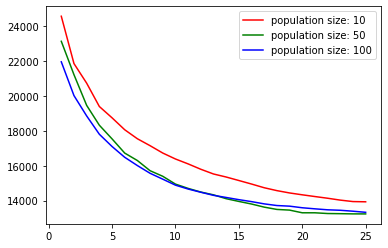

Plot of average best individual for each generation across 20 runs, for routes build of 24 cities using the Baldwinian approach: 


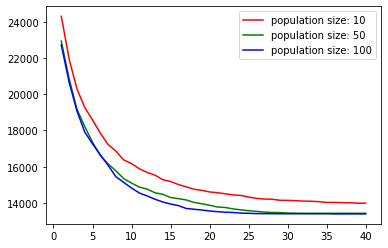

Total distance can be seen along y-axis, while the generation number can be read alon x-axis.


In [57]:
print("Plot of average best individual for each generation across 20 runs, for routes build of 24 cities using the " 
      "Lamarckian approach: ")
x3 = [i for i in range(1,26)]
plt.plot(x3, best_avr_per_gen_pop24[0], 'r', label = f'population size: {populations24[0]}')
plt.plot(x3, best_avr_per_gen_pop24[1], 'g', label = f'population size: {populations24[1]}')
plt.plot(x3, best_avr_per_gen_pop24[2], 'b', label = f'population size: {populations24[2]}')
plt.legend()
plt.show()

print("Plot of average best individual for each generation across 20 runs, for routes build of 24 cities using the " 
      "Baldwinian approach: ")
x3 = [i for i in range(1,41)]
plt.plot(x3, best_avr_per_gen_pop25[0], 'r', label = f'population size: {populations25[0]}')
plt.plot(x3, best_avr_per_gen_pop25[1], 'g', label = f'population size: {populations25[1]}')
plt.plot(x3, best_avr_per_gen_pop25[2], 'b', label = f'population size: {populations25[2]}')
plt.legend()
plt.show()


print(f'Total distance can be seen along y-axis, while the generation number can be read alon x-axis.')